In [10]:
from PIL import Image
import numpy as np

# Load the original image
inp = Image.open("fr_jpg.jpg")

# Convert the image to a numpy array
inp_array = np.array(inp)

# Define the green screen color range (adjust these values as needed)
lower_green = np.array([0, 100, 0])
upper_green = np.array([100, 255, 100])

# Mask the green screen
mask = np.all((inp_array >= lower_green) & (inp_array <= upper_green), axis=-1)

# Create a new RGBA array
rgba = np.dstack((inp_array, np.where(mask, 0, 255))).astype(np.uint8)

# Convert the modified numpy array back to an image
modified_image = Image.fromarray(rgba, 'RGBA')

# Save the modified image to the same directory
modified_image.save("modified_image.png")

# Display the modified image
modified_image.show()



(eog:11697): EOG-WARNING **: 17:13:25.305: Couldn't load icon: Icon 'image-loading' not present in theme Cupertino-Ventura


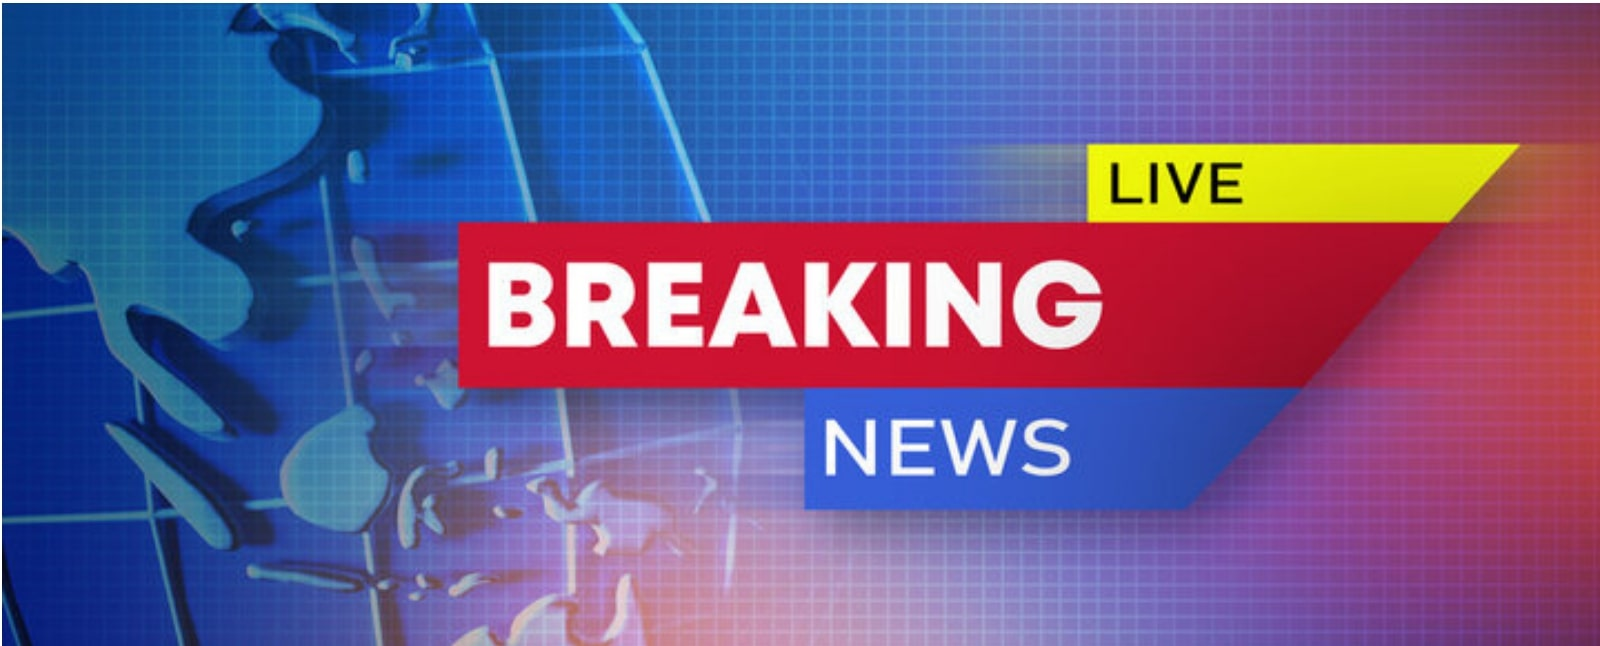

In [8]:
#loading backgroung image
news_image = Image.open(r"bg_jpg.jpg")
news_image

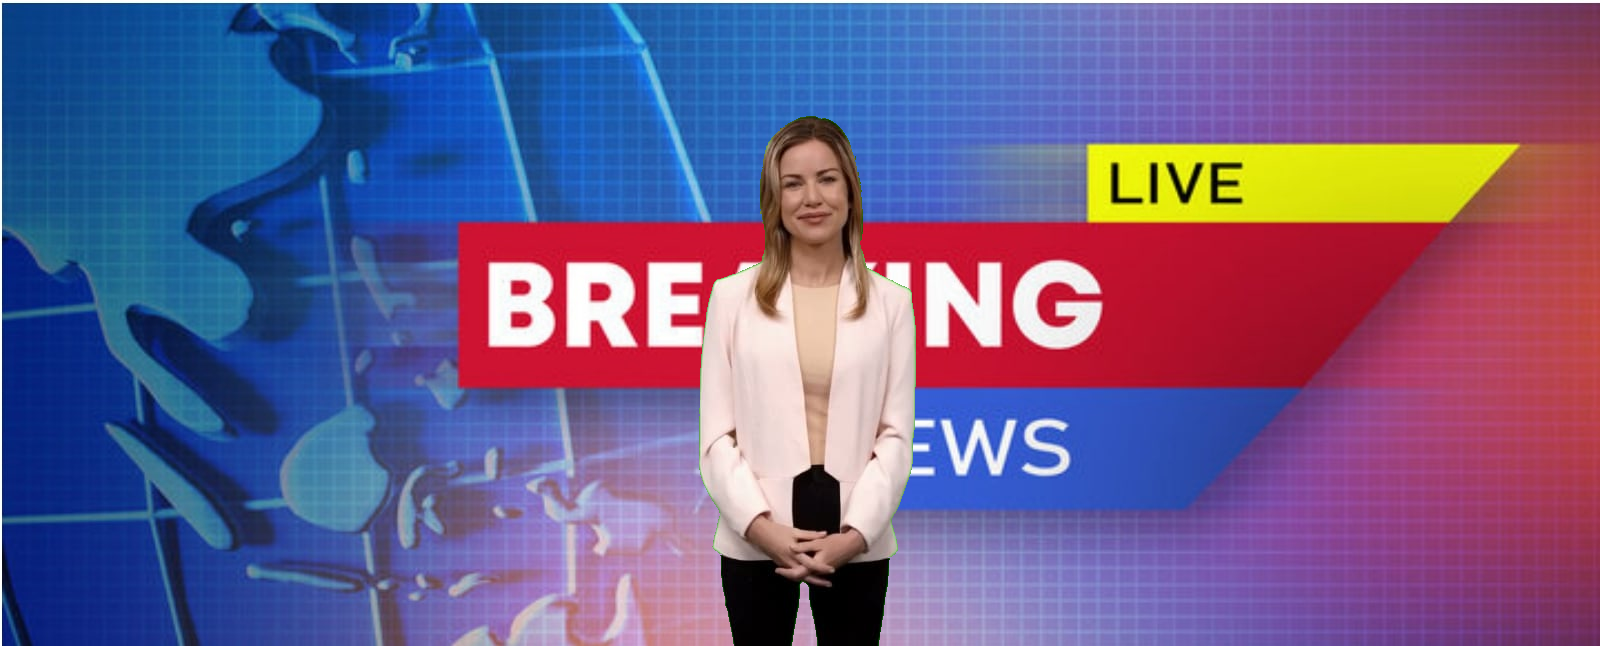

In [9]:

# Load the modified image
modified_image = Image.open("modified_image.png").convert("RGBA")

# Load the background image
background_image = Image.open("bg_jpg.jpg").convert("RGBA")

# Resize the background image to match the size of the modified image
background_image = background_image.resize(modified_image.size)

# Blend the modified image with the background using its alpha channel
final_image = Image.alpha_composite(background_image, modified_image)

# Save the final image
final_image.save("final_image.png")

# Display the final image
final_image
